## Gradient Boosting

Best parameters found: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 0.7}
Best cross-validation MAE: 0.0918
Mean Absolute Error (MAE): 0.0906
Mean Squared Error (MSE): 0.0149
R-squared (R2): 0.8715
Root Mean Squared Error (RMSE): 0.1220
Mean Actual Value: 7.1070847159572486
Mean Absolute Percentage Error (MAPE): 1.29%
最適なGradient Boostingモデルが /Users/hayakawakazue/Downloads/second_apt_2024_summer/model/gradient_boosting_0806_2.joblib に保存されました。


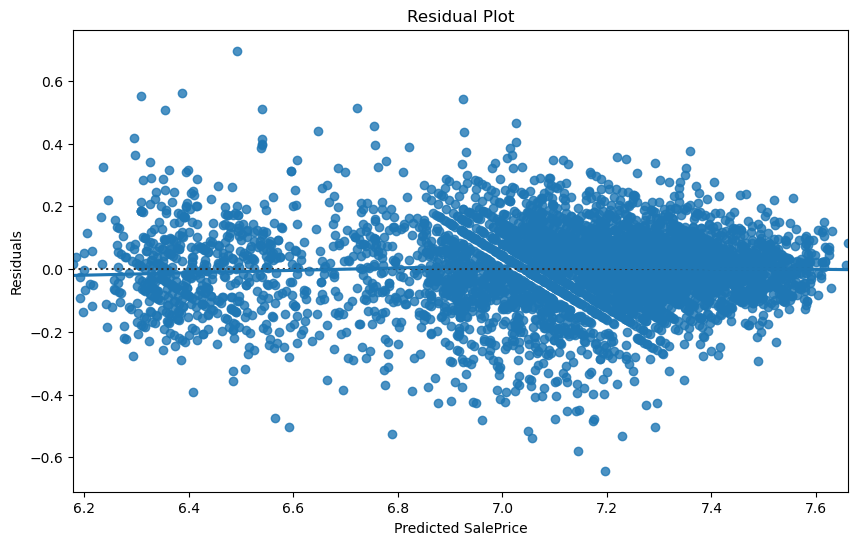

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 保存されたデータの読み込み
data_path = '/Users/hayakawakazue/Downloads/second_apt_2024_summer/train/train_41_42_43_44_45_46_47/train_41_42_43_44_45_46_47_scaled_features.csv'
data = pd.read_csv(data_path)

# 特徴量の選択
selected_features = [
    '長期価格トレンド', 'エリア人気度スコア', '市区町村コード', 
    '取引時点', '駅距離_面積比', '面積/築年数比', '建築年スコア', 
    '築年数', '面積×容積率', '建築年×建ぺい率'
]

# 特徴量と目的変数を分ける
X = data[selected_features]
y = data['取引価格（総額）_log']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boostingのグリッドサーチ
gbr_model = GradientBoostingRegressor(random_state=42)

# パラメータの設定
gbr_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.5, 0.7],
    'min_samples_split': [5, 10]
}

gbr_grid_search = GridSearchCV(estimator=gbr_model, param_grid=gbr_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=0)
gbr_grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {gbr_grid_search.best_params_}")
print(f"Best cross-validation MAE: {-gbr_grid_search.best_score_:.4f}")

# 最適なモデルを取得
gbr_best = gbr_grid_search.best_estimator_

# テストデータを使った予測
y_pred = gbr_best.predict(X_test)

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 実際の値の平均を計算
mean_actual_value = np.mean(y_test)
print(f"Mean Actual Value: {mean_actual_value}")

# 誤差のパーセンテージを計算
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# モデルの保存
model_path = os.path.join('/Users/hayakawakazue/Downloads/second_apt_2024_summer/model', 'gradient_boosting_0806_2.joblib')
joblib.dump(gbr_best, model_path)
print(f"最適なGradient Boostingモデルが {model_path} に保存されました。")

# 残差プロットの作成
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()


## 過学習の有無を計算する

Training Mean Absolute Error (MAE): 0.0829
Training Mean Squared Error (MSE): 0.0127
Training R-squared (R2): 0.8841
Training Root Mean Squared Error (RMSE): 0.1129


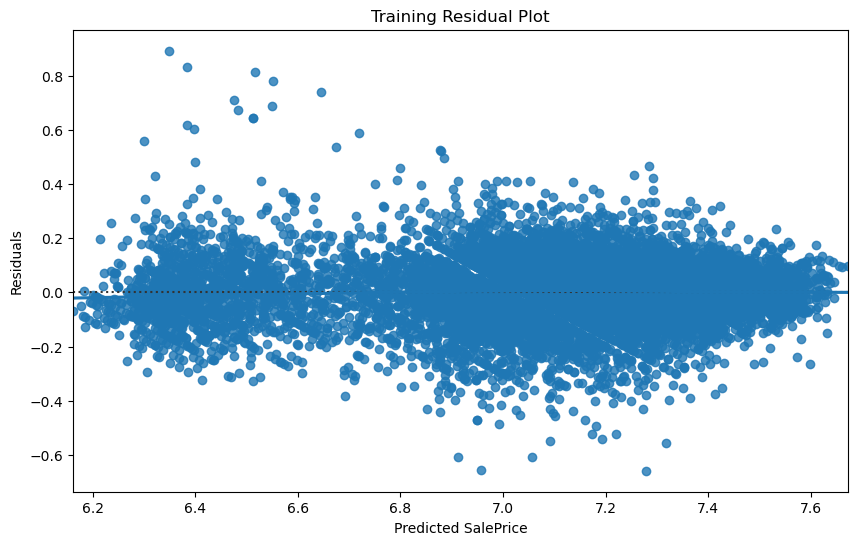

In [2]:
import seaborn as sns

# トレーニングデータを使った予測
y_train_pred = gbr_best.predict(X_train)

# トレーニングデータの評価指標の計算
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 結果の表示
print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training R-squared (R2): {train_r2:.4f}")
print(f"Training Root Mean Squared Error (RMSE): {train_rmse:.4f}")

# 残差プロットの作成（トレーニングデータ）
plt.figure(figsize=(10, 6))
sns.residplot(x=y_train_pred, y=(y_train - y_train_pred), lowess=True)
plt.title('Training Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

## クロスバリエーション

In [3]:
from sklearn.model_selection import cross_val_score

# クロスバリデーションの実施
cv_scores = cross_val_score(gbr_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# 平均スコアの計算
mean_cv_score = -cv_scores.mean()

print(f"Cross-validation Mean Absolute Error (MAE): {mean_cv_score:.4f}")

Cross-validation Mean Absolute Error (MAE): 0.0918
